In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib as mpl
import pandas as pd
import seaborn as sb
import camelot

# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['text.usetex'] = True
# plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.family'] = "serif"

The data for this plot come from the [EPA Greenhouse Gas Inventory: 1991-2021](https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks)

In [ ]:
tables = camelot.read_pdf("../../data/us-ghg-inventory-2024-chapter-executive-summary_04-16-2024.pdf",
                          flavor="stream",
                          pages="21")

<TableList n=1>

In [ ]:
df = tables[0].df.iloc[5:12,0:8].reset_index(drop=True)
df.columns = df.iloc[0]
df = df.iloc[1:,:]
df.set_index('Economic Sectors', inplace=True)
for col in df.columns:
    df[col] = df[col].str.replace(",","")

df = df.astype(float)

In [51]:
df = (df.div(df.sum(axis=0))*100).round(2)

In [2]:
data_dict = {'Electric Power':25.0, 
       'Industrial':23.5,
       'Commercial \& Residential':12.7,
       'Agriculture':10.0,
       'Transportation':28.5}
df = pd.DataFrame({'sectors':list(data_dict.keys()), 
         'values':np.array(list(data_dict.values())).astype('float')})
df.set_index('sectors',drop=True,inplace=True)
# df = pd.DataFrame(dict(zip(data_dict.keys(), data_dict.values())))
df.sort_values(by='values',inplace=True)
display(df)

,values
sectors,
Agriculture,10.0
Commercial \& Residential,12.7
Industrial,23.5
Electric Power,25.0
Transportation,28.5


/var/folders/pl/5f0kr4zj1_n7txmj619qn2th0000gn/T/ipykernel_91968/2485859385.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels=ax.yaxis.get_ticklabels(), fontsize=16)


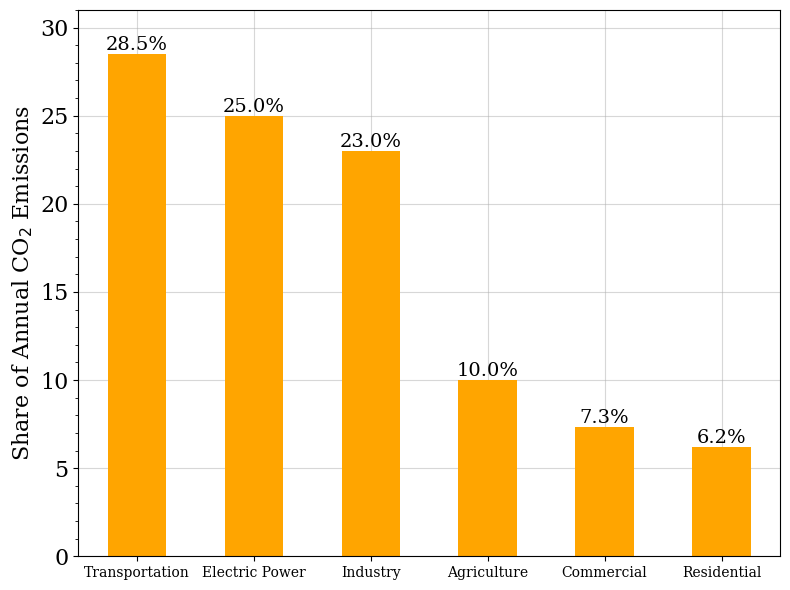

In [72]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
df['2022'].plot.bar(ax=ax, legend=False, color='orange', zorder=2)
ax.grid(which='major', alpha=0.5, zorder=0)
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.grid(which='minor', alpha=0, linestyle='--', zorder=0)
ax.set_yticklabels(labels=ax.yaxis.get_ticklabels(), fontsize=16)
xlabels=['Transportation', 'Electric Power', 'Industry', 'Agriculture',
'Commercial', 'Residential']
# ax.set_xticklabels(labels=ax.xaxis.get_ticklabels(), fontsize=12, rotation=20)
ax.set_xticklabels(labels=xlabels, fontsize=10, rotation=0)
# ax.set_xticklabels(labels=df.index, fontsize=16, rotation=20)
ax.set_xlabel('')
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=14)

ax.set_ylabel("Share of Annual CO$_2$ Emissions", fontsize=16)
ax.set_ylim(0,31)

plt.tight_layout()
plt.show()
# plt.savefig("../../docs/figures/emissions-by-sector.pgf")